<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [6]:
# IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

plt.style.use('ggplot')

In [7]:
import sklearn
sklearn. __version__

'0.23.2'

In [2]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'
df = pd.read_csv(breast_cancer_csv)

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
cleaned_df = df.drop('Unnamed: 32', axis=1)
cleaned_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:>

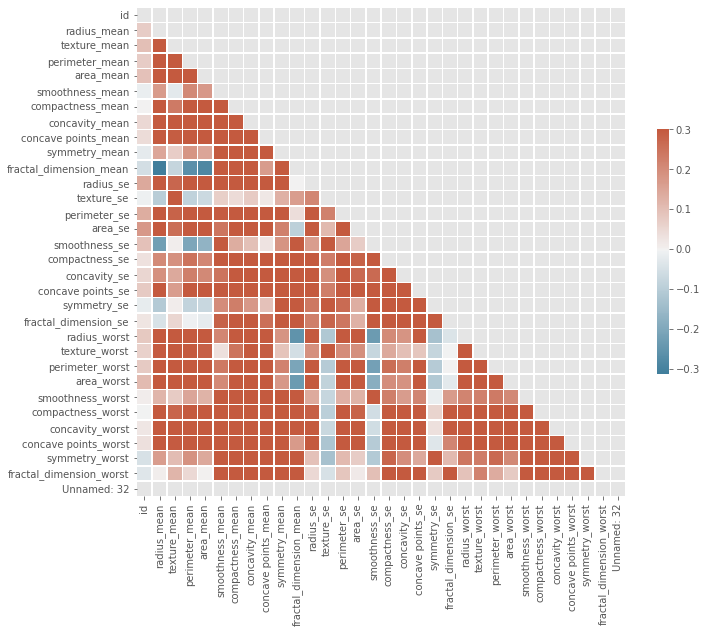

In [13]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [15]:
# ANSWER # convert to numerical
columns=cleaned_df.columns
X = cleaned_df[[col for col in columns if col != 'id' and col != 'diagnosis']]
y = cleaned_df.diagnosis
y.replace('B', 0, inplace=True)
y.replace('M', 1, inplace=True)
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### 4. What is the baseline accuracy?

In [16]:
# ANSWER: 0 happens more frequently than 1 (i.e. benign), if take all benign then we will have accuracy of 0.67 -> beat this
1 - y.mean()

0.6274165202108963

### 5. Choose features to be your predictor variables and set up your X.

In [17]:
# ANSWER
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [20]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)

# fit on the unstandardized data:

knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [21]:
# ANSWER
# predict the response values for the observations in X ("test the model")
# store the predicted response values
# value is 1 due to overfitting
knn.score(X,y)

1.0

### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [26]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# STEP 2: train the model on the training set (using K=1)
knn.fit(X_train, y_train)
# STEP 3: test the model on the testing set, and check the accuracy
knn.score(X_test, y_test)

0.9298245614035088

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [27]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
knn = KNeighborsClassifier(n_neighbors=len(X_train))
# Fit Train Data
knn.fit(X_train, y_train)
# Print accuracy_score
knn.score(X_test, y_test)

0.6228070175438597

In [28]:
#look at baseline again
1 - y.mean()

0.6274165202108963

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

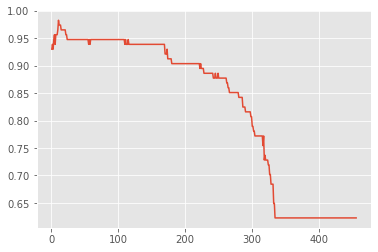

In [29]:
# ANSWER

# 1. create lists
test_accuracies = []
num_neighbors = []

# plot test accuracy by number of neighbors:

start = 1
stop = len(X_train) + 1

for k in range(start, stop):

# 2. instantiate model
    knn = KNeighborsClassifier(n_neighbors=k)

# 3. fit and predict
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    
# 4. append to list
    test_accuracies.append(score)
    num_neighbors.append(k)

# plot test accuracy by number of neighbors:

plt.plot(num_neighbors, test_accuracies)

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [30]:
# ANSWER

# 1. create lists
test_accuracies = []
num_neighbors = []

# plot test accuracy by number of neighbors:

start = 1
stop = len(X_train) + 1

for k in range(start, 350):

# 2. instantiate model
    knn = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5)
    score = sum(scores)/len(scores)
    
# 3. append to list
    test_accuracies.append(score)
    num_neighbors.append(k)

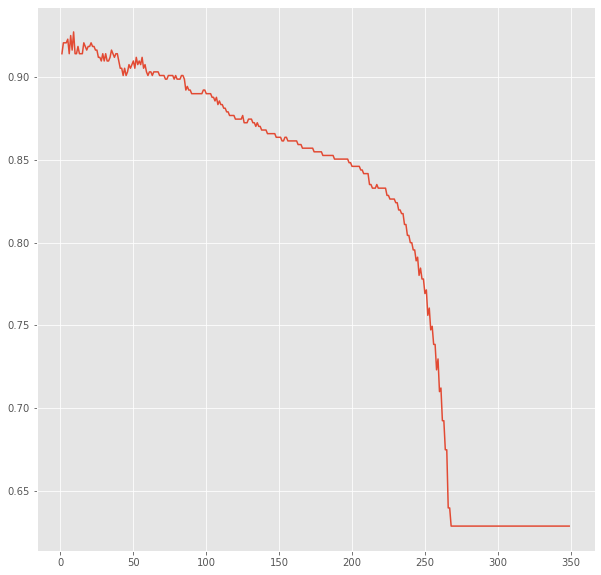

In [31]:
plt.figure(figsize=(10,10))
plt.plot(num_neighbors, test_accuracies)

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [34]:
# ANSWER
# Standarize X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=349)

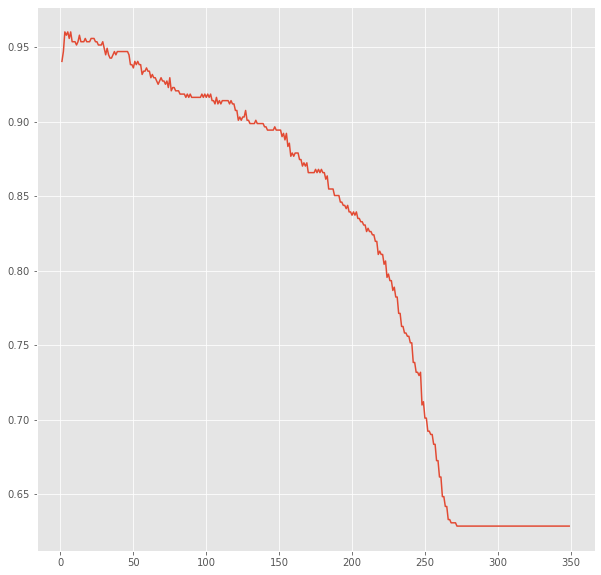

In [35]:
# ANSWER
# plot test accuracy by number of neighbors:
# ANSWER

# 1. create lists
test_accuracies = []
num_neighbors = []

# plot test accuracy by number of neighbors:

start = 1
stop = len(X_train) + 1

for k in range(start, 350):

# 2. instantiate model
    knn = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5)
    score = sum(scores)/len(scores)
    
# 3. append to list
    test_accuracies.append(score)
    num_neighbors.append(k)

plt.figure(figsize=(10,10))
plt.plot(num_neighbors, test_accuracies)

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



